 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace = True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_returns_df.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace = True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_history_df.head(5)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
# Replace $ 
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')

# Set close data type to float
sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)

# Check 
sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.head(5)

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_history_df = sp500_history_df.dropna()
sp500_history_df.head(5)

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_history_df = sp500_history_df.rename(columns = {'Close' : 'S&P 500'})
sp500_history_df.head(5)

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE


data = pd.concat([whale_df, algo_returns_df, sp500_history_df], axis = 'columns', join = 'inner')
data.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

Text(0.5, 1.0, 'Daily Returns')

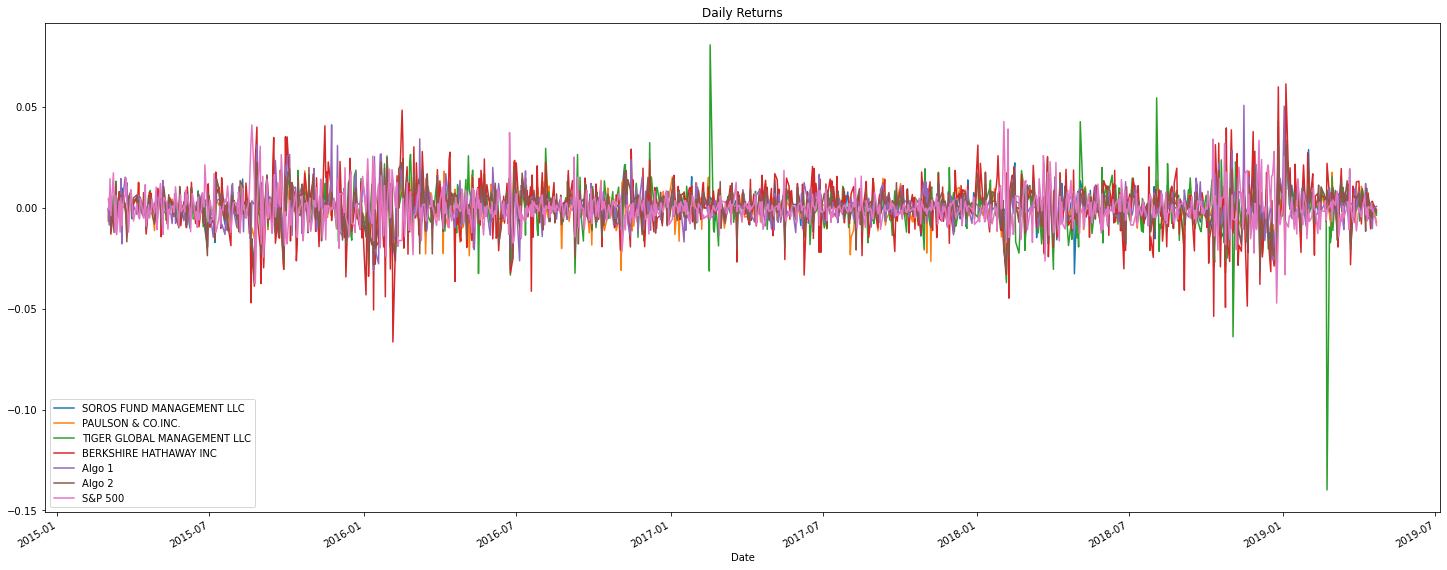

In [15]:
# Plot daily returns
# YOUR CODE HERE
plot = data.plot(legend=True, figsize = (25,10))
plot.set_title('Daily Returns')

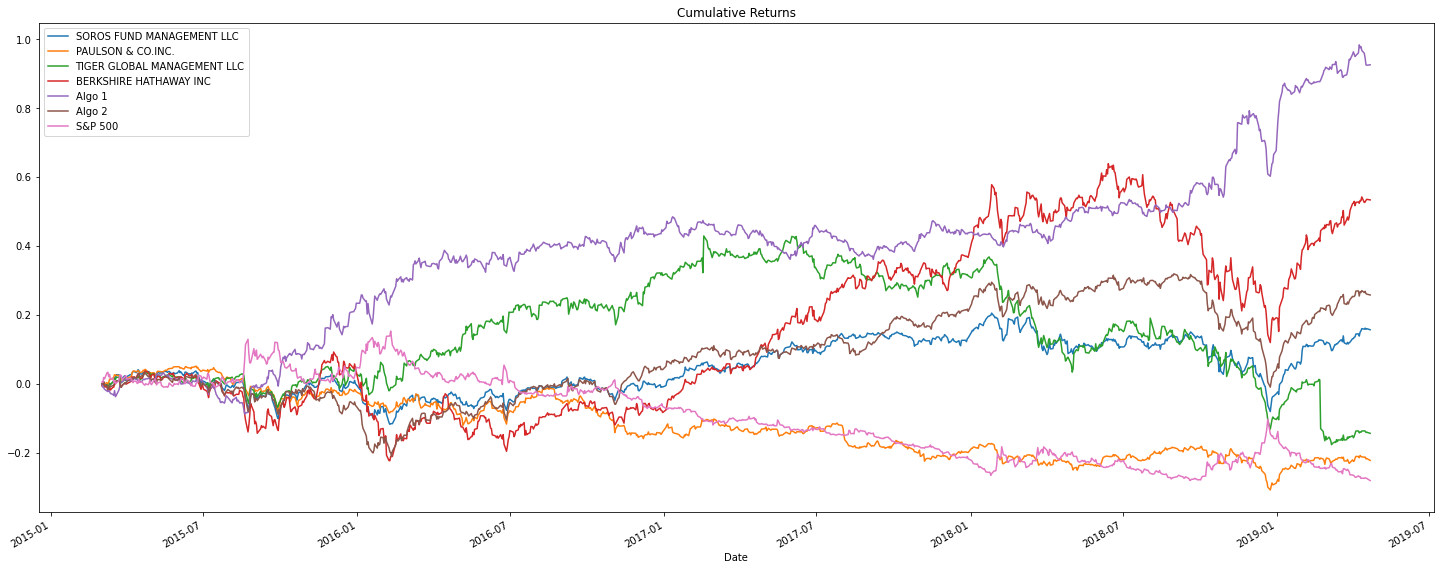

In [16]:
# Plot cumulative returns 
# YOUR CODE HERE

cumulative_returns = (1 + data).cumprod() - 1
cumulative_returns_plot = cumulative_returns.plot(legend = True, figsize = (25,10))
cumulative_returns_plot.set_title('Cumulative Returns')
cumulative_returns_plot

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

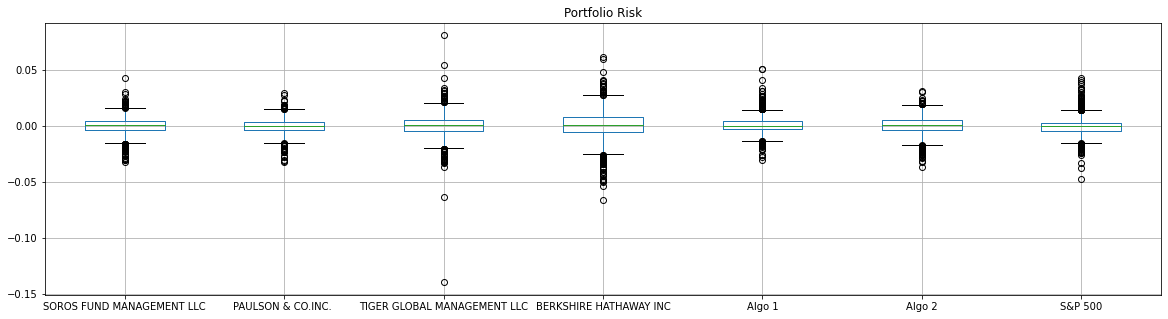

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE

boxplot = data.boxplot(figsize = (20, 5))
boxplot.set_title('Portfolio Risk')
boxplot



In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

standard_deviation = data.std() 
print(standard_deviation)

        

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64


In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
risky = (standard_deviation > standard_deviation['S&P 500'])
standard_deviation['More Risky than S&P 500'] = risky
print(standard_deviation['More Risky than S&P 500'])


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


In [20]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_standard_deviation = data.std() * np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

Text(0.5, 1.0, '21 Day Rolling Statistics')

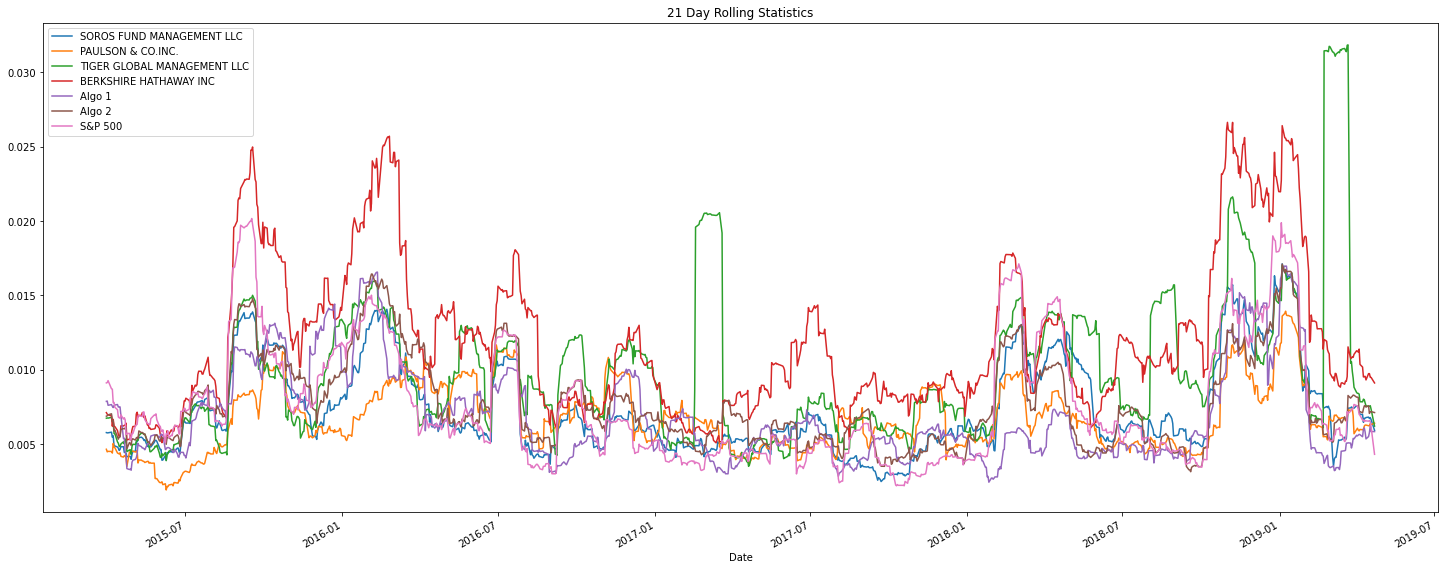

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
# set windows with rolling
rolling_data = data.rolling(21).std().plot(figsize = (25,10))
rolling_data.set_title('21 Day Rolling Statistics')

In [22]:
# Construct a correlation table
# YOUR CODE HERE
data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


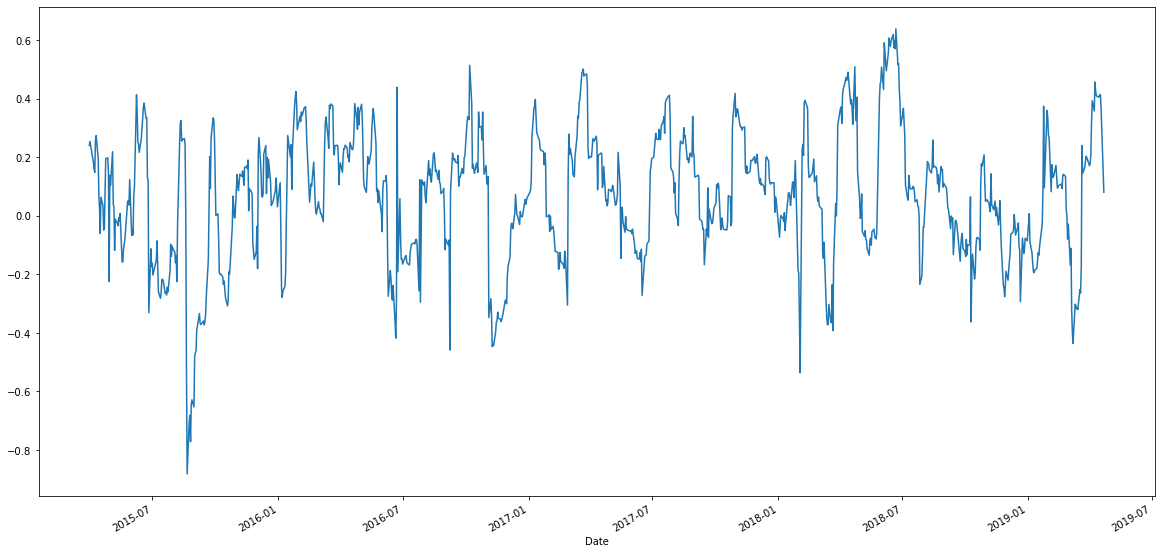

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
soros_cov = data['SOROS FUND MANAGEMENT LLC'].rolling(21).cov(data['S&P 500'])
soros_var = data['SOROS FUND MANAGEMENT LLC'].rolling(21).var()
soros_beta = soros_cov / soros_var

soros_beta.plot(figsize = (20,10))

Text(0.5, 1.0, 'Exponential Weighted Moving Average')

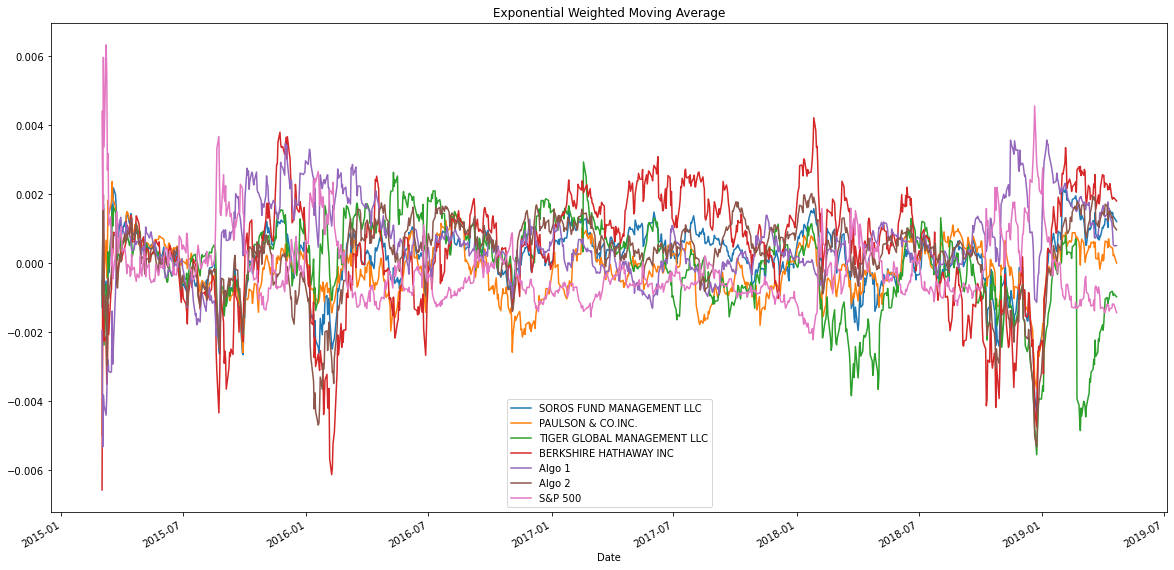

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
exp_weighted_average = data.ewm(halflife = 21).mean()
exp_weighted_average_plot = exp_weighted_average.plot(figsize = (20,10))
exp_weighted_average_plot.set_title('Exponential Weighted Moving Average')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (data.mean() * 252) / annualized_standard_deviation
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

Text(0.5, 1.0, 'Sharpe Ratio')

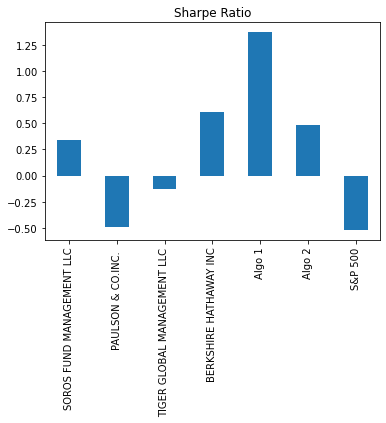

In [26]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_plot = sharpe_ratio.plot.bar()
sharpe_plot.set_title('Sharpe Ratio')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Yes

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at least 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [69]:
# Read the first stock
# YOUR CODE HERE
AAPL_file_path = Path('Resources/AAPL_historical.csv')

AAPL_df = pd.read_csv(AAPL_file_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)

AAPL_df = AAPL_df.rename(columns = {'NOCP': 'AAPL'})

AAPL_df.head(5)

,Symbol,AAPL
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [73]:
# Read the second stock
# YOUR CODE HERE
COST_file_path = Path('Resources/cost_historical.csv')

COST_df = pd.read_csv(COST_file_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)

COST_df = COST_df.rename(columns = {'NOCP' : 'COST'})

COST_df.head(5)

,Symbol,COST
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [84]:
# Read the third stock
# YOUR CODE HERE
GOOG_file_path = Path('Resources/goog_historical.csv')

GOOG_df = pd.read_csv(GOOG_file_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)

GOOG_df = GOOG_df.rename(columns = {'NOCP' : 'GOOG'})


GOOG_df.head(5)

,Symbol,GOOG
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [85]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_portfolio = pd.concat([AAPL_df, COST_df, GOOG_df], axis = 'columns', join = 'inner')
my_portfolio.head(5)

,Symbol,AAPL,Symbol,COST,Symbol,GOOG
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40


In [86]:
# Reset the index
# YOUR CODE HERE

#I did it above


In [87]:
# Pivot so that each column of prices represents a unique symbol
#also done above

In [88]:
# Drop Nulls
# YOUR CODE HERE
my_portfolio = my_portfolio.dropna()
my_portfolio.head(5)

,Symbol,AAPL,Symbol,COST,Symbol,GOOG
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [95]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

weighted_returns = my_portfolio

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [97]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

custom_v_other = pd.concat([data, weighted_returns], axis = 'columns', join = 'outer')

custom_v_other = mine_vs_others.rename(columns = {0: 'Custom'})

custom_v_other.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Symbol,AAPL,Symbol,COST,Symbol,GOOG
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-16,0.007901,0.003583,0.007953,0.008055,-0.003395,0.004117,0.003331,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
custom_v_other = custom_v_other.dropna()
custom_v_other.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Symbol,AAPL,Symbol,COST,Symbol,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,AAPL,186.31,COST,198.96,GOOG,1066.36
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146,AAPL,187.63,COST,199.62,GOOG,1079.58
2018-05-22,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003238,AAPL,187.16,COST,198.97,GOOG,1069.73
2018-05-23,-0.000899,-0.000659,0.005062,0.011108,-0.002093,0.001962,0.002027,AAPL,188.36,COST,198.14,GOOG,1079.69
2018-05-24,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,0.002363,AAPL,188.15,COST,198.89,GOOG,1079.24


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [111]:
# Risk
# YOUR CODE HERE
both_std = custom_v_other.std()

annualized_std_both = custom_v_other * 15
#didnt like float value
annualized_std_both

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Symbol,AAPL,Symbol,COST,Symbol,GOOG
2018-05-11,-0.070750,0.014731,0.039367,-0.061869,0.005364,0.004220,-0.013241,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,2828.85,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,2936.40,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,16473.90
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.013723,0.024523,0.103340,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,2822.25,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,2938.20,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,16503.00
2018-05-15,-0.010888,-0.021132,-0.047842,-0.219089,-0.017021,-0.017082,-0.060662,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,2796.60,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,2932.20,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,16188.45
2018-05-16,0.129559,0.093666,0.082193,0.064649,-0.034897,0.050112,0.012849,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,2822.70,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,2980.65,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,16226.55
2018-05-17,-0.029332,0.037858,-0.094007,-0.077097,-0.104239,0.078073,0.039588,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,2804.85,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,2994.00,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,16178.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.021330,-0.017344,0.005969,-0.157385,-0.064969,-0.068575,-0.007637,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,2988.45,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,3694.95,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,18316.50
2019-04-16,0.040491,0.005822,-0.012464,0.012550,-0.104170,0.043491,0.034184,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,2988.75,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,3680.10,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,18406.95
2019-04-17,-0.043451,-0.097007,-0.066142,0.048332,-0.154515,-0.078422,-0.023649,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,3046.95,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,3683.40,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,18545.10
2019-04-18,0.021719,0.018327,0.008723,0.028741,-0.008819,-0.018438,-0.015165,AAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAAPLAA...,3057.90,COSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCOSTCO...,3687.15,GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGO...,18545.55


Text(0.5, 1.0, '21 Day Rolling Standard Deviation')

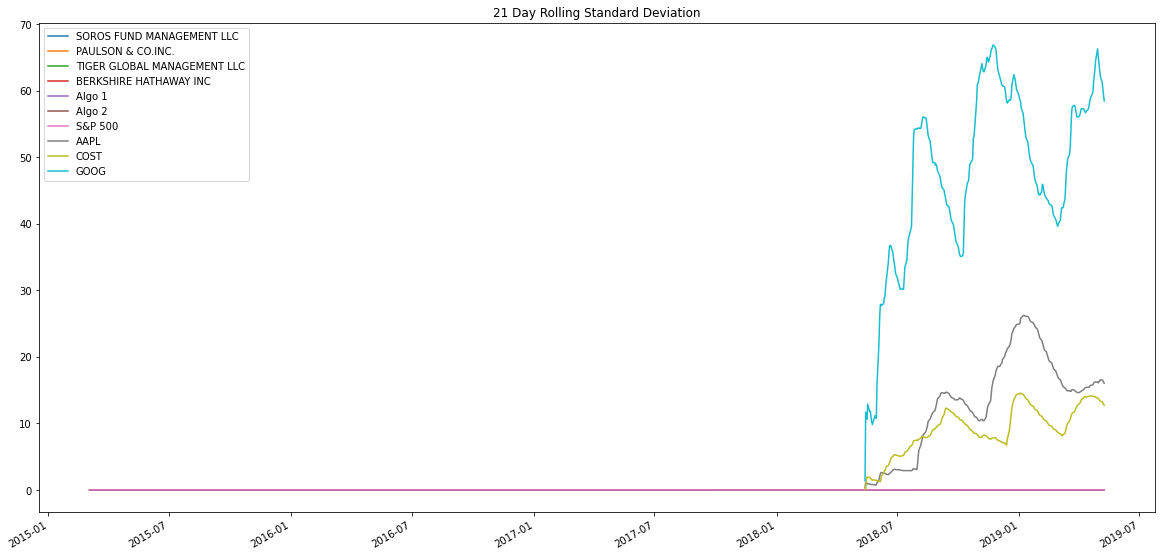

In [112]:
# Rolling
# YOUR CODE HERE
both_weighted_std = mine_vs_others.ewm(halflife = 21).std()
both_weighted_std_plot = both_weighted_std.plot(figsize = (20,10))
both_weighted_std_plot.set_title('21 Day Rolling Standard Deviation')

In [113]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

both_sharpe_ratio = (mine_vs_others.mean() * 252) #/ annualized_std_both
both_sharpe_ratio

SOROS FUND MANAGEMENT LLC           0.042981
PAULSON & CO.INC.                  -0.054807
TIGER GLOBAL MANAGEMENT LLC        -0.022521
BERKSHIRE HATHAWAY INC              0.124430
Algo 1                              0.165729
Algo 2                              0.064132
S&P 500                            -0.070689
AAPL                            48317.401440
COST                            55971.548640
GOOG                           286588.622880
dtype: float64

Text(0.5, 1.0, 'Sharpe Ratio')

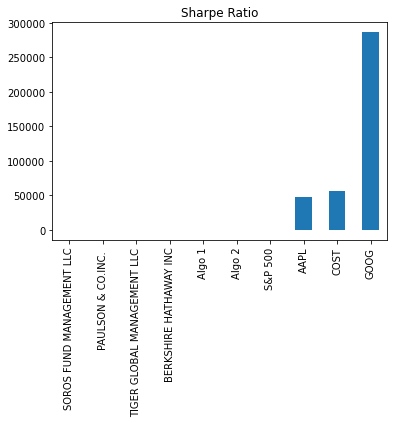

In [114]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
both_sharpe_plot = both_sharpe_ratio.plot.bar()
both_sharpe_plot.set_title('Sharpe Ratio')

In [115]:
# Create a correlation analysis
# YOUR CODE HERE
custom_v_other.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,-0.050062,0.029908,0.116906
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.005247,0.006184,0.136350
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.025867,0.032799,0.093394
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,-0.086590,-0.002391,0.060483
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,-0.009648,0.028899,-0.075254
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,-0.077637,-0.004001,0.135601
S&P 500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.119074,0.054865,0.017112
AAPL,-0.050062,0.005247,0.025867,-0.086590,-0.009648,-0.077637,0.119074,1.000000,0.564346,0.536807
COST,0.029908,0.006184,0.032799,-0.002391,0.028899,-0.004001,0.054865,0.564346,1.000000,0.482371
GOOG,0.116906,0.136350,0.093394,0.060483,-0.075254,0.135601,0.017112,0.536807,0.482371,1.000000
